# Projeto para o TCC

### Objetivo: Fazer predição de valores com diferentes metodos e depois fazer uma analise de dados dos resultados

In [5]:
pip install yfinance

     ---------------------------------------- 65.3/65.3 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 62.6/62.6 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 11.1/11.1 MB 4.8 MB/s eta 0:00:00
     -------------------------------------- 143.0/143.0 kB 8.3 MB/s eta 0:00:00
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
     ---------------------------------------- 15.6/15.6 MB 6.1 MB/s eta 0:00:00
     -------------------------------------- 502.5/502.5 kB 6.3 MB/s eta 0:00:00
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
     -------------------------------------- 341.8/341.8 kB 7.1 MB/s eta 0:00:00
     -------------------------------------- 158.3/158.3 kB 9.9 MB/s eta 0:00:00
     -------------------------------------- 123.9/123.9 kB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 96.9/96.9 kB ? eta 0:00:00
     -----


[notice] A new release of pip available: 22.2.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import yfinance as yf

In [17]:
import datetime
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#codigos_de_negociacao = ["BBAS3.SA", "PETR4.SA", "VALE3.SA"]

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_bbas3 = yf.download("BBAS3.SA", um_ano_atras, hoje)
dados_petr4 = yf.download("PETR4.SA", um_ano_atras, hoje)
dados_vale3 = yf.download("VALE3.SA", um_ano_atras, hoje)


display(dados_bbas3)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-08,37.779999,38.299999,37.320000,38.070000,34.895782,14742300
2022-11-09,37.639999,38.560001,36.919998,37.060001,33.969994,18987500
2022-11-10,37.000000,37.680000,35.669998,36.330002,33.300865,64558100
2022-11-11,36.310001,36.650002,35.360001,35.520000,32.558399,54156800
2022-11-14,36.000000,36.799999,35.650002,36.400002,33.365021,23033900
...,...,...,...,...,...,...
2023-10-31,48.480000,48.849998,47.779999,48.349998,48.349998,7043700
2023-11-01,48.360001,48.740002,48.080002,48.400002,48.400002,10905000
2023-11-03,48.950001,50.459999,48.849998,50.099998,50.099998,12382700


In [7]:
df_bbas3 = dados_bbas3
df_petr4 = dados_petr4
df_vsle3 = dados_vale3

df_bbas3['Adj Close_next_day'] = dados_bbas3['Adj Close'].shift(-1)
df_petr4['Adj Close_next_day'] = dados_petr4['Adj Close'].shift(-1)
df_vsle3['Adj Close_next_day'] = dados_vale3['Adj Close'].shift(-1)

In [12]:
df_bbas3 = df_bbas3.drop(df_bbas3.index[-1])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
X = df_bbas3.iloc[:, 1:-1] # Todas as colunas, exceto a última e a priemira
y = df_bbas3.iloc[:, -1] # Última coluna

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [15]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = regression_model.predict(X_test)

In [21]:
# importando as funções de avaliação
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# exibindo os resultados
print('Modelo Linear Regression\n')
print("RMSE:", rmse)
print("R²:", r2)

Modelo Linear Regression

RMSE: 0.7039433980627148
R²: 0.9878025920841974


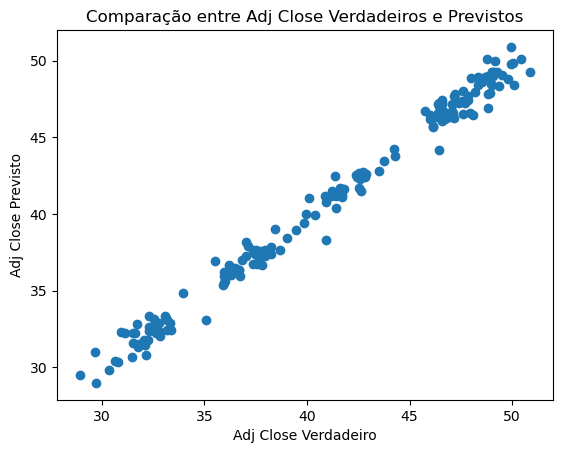

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel("Adj Close Verdadeiro")
plt.ylabel("Adj Close Previsto")
plt.title("Comparação entre Adj Close Verdadeiros e Previstos")
plt.show()

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
model_2 = DecisionTreeRegressor()
model_2.fit(X_train, y_train)

DecisionTreeRegressor()

In [26]:
# avaliar o desempenho de acurácia usando o cross-validation
cv_2 = cross_val_score(estimator=model_2, X=X_train, y=y_train, cv=10)

# calcular o desempenho usando a métrica r2
y_pred_train_2 = model_2.predict(X_train)
r2_train_2 = r2_score(y_train, y_pred_train_2)

y_pred_test_2 = model_2.predict(X_test)
r2_test_2 = r2_score(y_test, y_pred_test_2)

# calcular o desepenho usando RMSE
rmse_2 = (np.sqrt(mean_squared_error(y_test, y_pred_test_2)))

In [27]:
# exibindo os resultados
print('Modelo DecisionTreeRegression\n')
print('CV: ', cv_2.mean())
print('R2 train:', r2_train_2)
print('R2 test:', r2_test_2)
print('RMSE:', rmse_2)

Modelo DecisionTreeRegression

CV:  0.9644717188883225
R2 train: 1.0
R2 test: 0.9763560666354939
RMSE: 0.9800851965688925
